In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
Train_set = pd.read_csv("/content/Train.csv")
Test_set = pd.read_csv("/content/Test.csv")

In [107]:
Train_set.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [108]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [109]:
Train_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [110]:
Train_set.Item_Identifier.value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [111]:
Train_set.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [112]:
Train_set.shape

(8523, 12)

In [113]:
Train_set.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [114]:
Train_set.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

missing Values:
the Item_Weight column will be handled by using the mean weight for the mission Values
the Outlet_Size column

# creating the model for filling the null values for the Outlet_Size


In [115]:
outlet_data = Train_set.loc[:,['Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type','Outlet_Size']]
outlet_data

,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_Size
0,1999,Tier 1,Supermarket Type1,Medium
1,2009,Tier 3,Supermarket Type2,Medium
2,1999,Tier 1,Supermarket Type1,Medium
3,1998,Tier 3,Grocery Store,NaN
4,1987,Tier 3,Supermarket Type1,High
...,...,...,...,...
8518,1987,Tier 3,Supermarket Type1,High
8519,2002,Tier 2,Supermarket Type1,NaN
8520,2004,Tier 2,Supermarket Type1,Small
8521,2009,Tier 3,Supermarket Type2,Medium


In [116]:
outlet_data_clean = outlet_data.dropna()
outlet_data_clean

,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_Size
0,1999,Tier 1,Supermarket Type1,Medium
1,2009,Tier 3,Supermarket Type2,Medium
2,1999,Tier 1,Supermarket Type1,Medium
4,1987,Tier 3,Supermarket Type1,High
5,2009,Tier 3,Supermarket Type2,Medium
...,...,...,...,...
8517,1997,Tier 1,Supermarket Type1,Small
8518,1987,Tier 3,Supermarket Type1,High
8520,2004,Tier 2,Supermarket Type1,Small
8521,2009,Tier 3,Supermarket Type2,Medium


In [117]:
from sklearn.model_selection import train_test_split

In [118]:
outlet_X = outlet_data_clean.drop('Outlet_Size',axis='columns')
outlet_X

,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,1999,Tier 1,Supermarket Type1
1,2009,Tier 3,Supermarket Type2
2,1999,Tier 1,Supermarket Type1
4,1987,Tier 3,Supermarket Type1
5,2009,Tier 3,Supermarket Type2
...,...,...,...
8517,1997,Tier 1,Supermarket Type1
8518,1987,Tier 3,Supermarket Type1
8520,2004,Tier 2,Supermarket Type1
8521,2009,Tier 3,Supermarket Type2


In [119]:
outlet_X = pd.get_dummies(outlet_X)
outlet_X

,Outlet_Establishment_Year,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1999,1,0,0,0,1,0,0
1,2009,0,0,1,0,0,1,0
2,1999,1,0,0,0,1,0,0
4,1987,0,0,1,0,1,0,0
5,2009,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
8517,1997,1,0,0,0,1,0,0
8518,1987,0,0,1,0,1,0,0
8520,2004,0,1,0,0,1,0,0
8521,2009,0,0,1,0,0,1,0


In [120]:
outlet_y = outlet_data_clean.Outlet_Size
outlet_y

0       Medium
1       Medium
2       Medium
4         High
5       Medium
         ...  
8517     Small
8518      High
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 6113, dtype: object

In [121]:
X_train, X_test, y_train, y_test = train_test_split(outlet_X, outlet_y, test_size=0.33, random_state=42)

In [122]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [123]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [124]:
y_predict = clf.predict(X_test)

In [125]:
clf.score(X_train,y_train)

0.8463980463980464

In [126]:
clf.score(X_test,y_test)

0.8508424182358771

In [127]:
y_test.value_counts()

Medium    913
Small     789
High      316
Name: Outlet_Size, dtype: int64

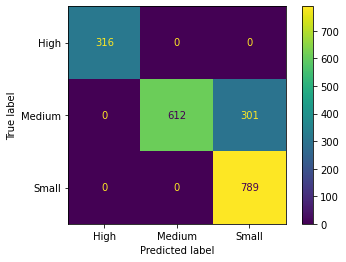

In [128]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['High', 'Medium','Small'])
cm_display.plot()
plt.show()

In [129]:
X = outlet_data[outlet_data.Outlet_Size.isna()]
X = X.drop('Outlet_Size',axis='columns')
X

,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
3,1998,Tier 3,Grocery Store
8,2002,Tier 2,Supermarket Type1
9,2007,Tier 2,Supermarket Type1
25,2007,Tier 2,Supermarket Type1
28,1998,Tier 3,Grocery Store
...,...,...,...
8502,2002,Tier 2,Supermarket Type1
8508,2002,Tier 2,Supermarket Type1
8509,1998,Tier 3,Grocery Store
8514,2002,Tier 2,Supermarket Type1


In [130]:
X.Outlet_Location_Type.unique()

array(['Tier 3', 'Tier 2'], dtype=object)

In [131]:
X = pd.get_dummies(X)
X

,Outlet_Establishment_Year,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1
3,1998,0,1,1,0
8,2002,1,0,0,1
9,2007,1,0,0,1
25,2007,1,0,0,1
28,1998,0,1,1,0
...,...,...,...,...,...
8502,2002,1,0,0,1
8508,2002,1,0,0,1
8509,1998,0,1,1,0
8514,2002,1,0,0,1


In [132]:
X['Outlet_Location_Type_Tier 1'] = 0
X['Outlet_Type_Supermarket Type2']=0
X['Outlet_Type_Supermarket Type3']=0
X

,Outlet_Establishment_Year,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Location_Type_Tier 1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3,1998,0,1,1,0,0,0,0
8,2002,1,0,0,1,0,0,0
9,2007,1,0,0,1,0,0,0
25,2007,1,0,0,1,0,0,0
28,1998,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
8502,2002,1,0,0,1,0,0,0
8508,2002,1,0,0,1,0,0,0
8509,1998,0,1,1,0,0,0,0
8514,2002,1,0,0,1,0,0,0


In [133]:
y = clf.predict(X)
y

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array(['Small', 'Small', 'Small', ..., 'Small', 'Small', 'Small'],
      dtype=object)

In [134]:
y = pd.Series(y)
y.value_counts()

Small    2410
dtype: int64

# Handling missing Values

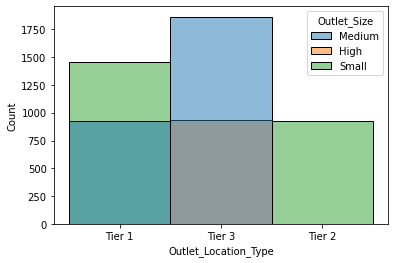

In [135]:
sns.histplot(x=Train_set.Outlet_Location_Type,hue = Train_set.Outlet_Size)

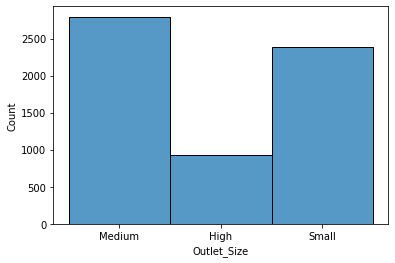

In [136]:
sns.histplot(x=Train_set.Outlet_Size)

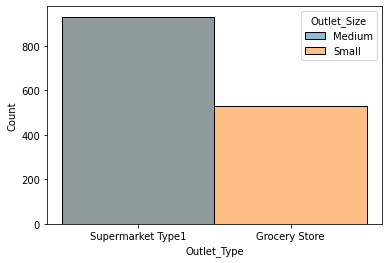

In [137]:
temp = Train_set[Train_set.Outlet_Location_Type=='Tier 1']
sns.histplot(x=temp.Outlet_Type,hue = temp.Outlet_Size)

In [138]:
outlet_data[outlet_data.Outlet_Size.isna()]

,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_Size
3,1998,Tier 3,Grocery Store,NaN
8,2002,Tier 2,Supermarket Type1,NaN
9,2007,Tier 2,Supermarket Type1,NaN
25,2007,Tier 2,Supermarket Type1,NaN
28,1998,Tier 3,Grocery Store,NaN
...,...,...,...,...
8502,2002,Tier 2,Supermarket Type1,NaN
8508,2002,Tier 2,Supermarket Type1,NaN
8509,1998,Tier 3,Grocery Store,NaN
8514,2002,Tier 2,Supermarket Type1,NaN


In [139]:
outlet_data.loc[outlet_data.Outlet_Type=='Grocery Store'].drop('Outlet_Establishment_Year',axis = 'columns').describe()

,Outlet_Location_Type,Outlet_Type,Outlet_Size
count,1083,1083,528
unique,2,1,1
top,Tier 3,Grocery Store,Small
freq,555,1083,528


In [140]:
Train_set.loc[Train_set.Outlet_Type=='Grocery Store'].Outlet_Size.unique()

array([nan, 'Small'], dtype=object)

In [141]:
Train_set.loc[Train_set.Outlet_Type=='Supermarket Type1'].Outlet_Size.unique()

array(['Medium', 'High', nan, 'Small'], dtype=object)

all the grocery stores are either small or null, so we will fill all the nulls with small for the remaining grocery stores.


In [142]:

Train_set.loc[(Train_set.Outlet_Type=='Grocery Store') & (Train_set.Outlet_Size.isna()),'Outlet_Size'] = 'Small'

In [143]:
Train_set.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [144]:
outlet_data = outlet_data.loc[(outlet_data.Outlet_Location_Type.isin(['Tier 3','Tier 2'])) & (outlet_data.Outlet_Type.isin(['Grocery Store','Supermarket Type1']))]
outlet_data

,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_Size
3,1998,Tier 3,Grocery Store,NaN
4,1987,Tier 3,Supermarket Type1,High
6,1987,Tier 3,Supermarket Type1,High
8,2002,Tier 2,Supermarket Type1,NaN
9,2007,Tier 2,Supermarket Type1,NaN
...,...,...,...,...
8513,2004,Tier 2,Supermarket Type1,Small
8514,2002,Tier 2,Supermarket Type1,NaN
8518,1987,Tier 3,Supermarket Type1,High
8519,2002,Tier 2,Supermarket Type1,NaN


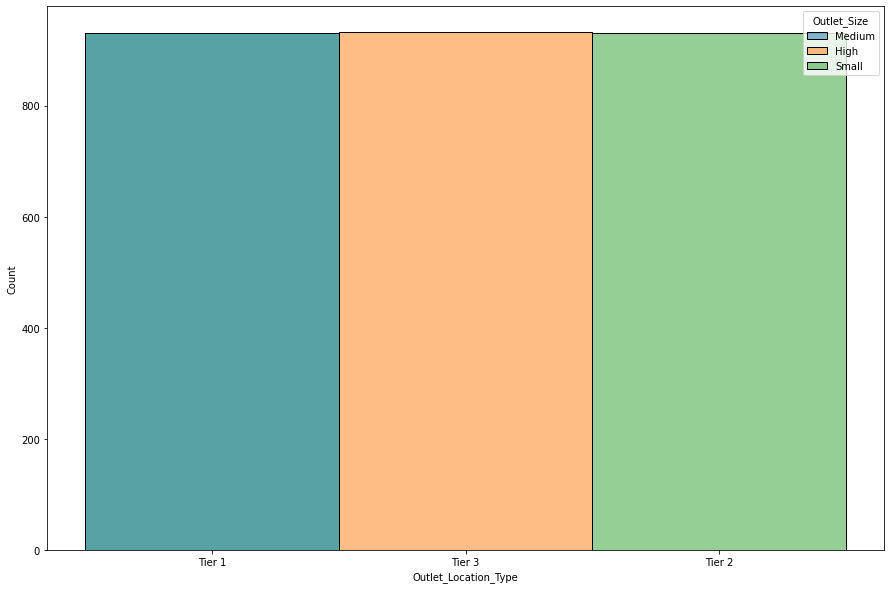

In [145]:
Type1_data = Train_set.loc[(Train_set.Outlet_Type=='Supermarket Type1')]
plt.figure(figsize=(15,10))
sns.histplot(Type1_data,x='Outlet_Location_Type',hue='Outlet_Size')

In [146]:
Type1_data[(Type1_data.Outlet_Location_Type=='Tier 1')&(Type1_data.Outlet_Size=='Medium')].count()

Item_Identifier              930
Item_Weight                  930
Item_Fat_Content             930
Item_Visibility              930
Item_Type                    930
Item_MRP                     930
Outlet_Identifier            930
Outlet_Establishment_Year    930
Outlet_Size                  930
Outlet_Location_Type         930
Outlet_Type                  930
Item_Outlet_Sales            930
dtype: int64

the rest of the null values in the Outlet_Size column will be filled using the following non-null value.


In [147]:
Train_set

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [148]:

Train_set.loc[Train_set.Item_Weight.isna(),'Item_Weight'] = Train_set.Item_Weight.mean()
Train_set

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [149]:
Train_set.fillna(method='bfill', axis=0,inplace=True)
Train_set.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

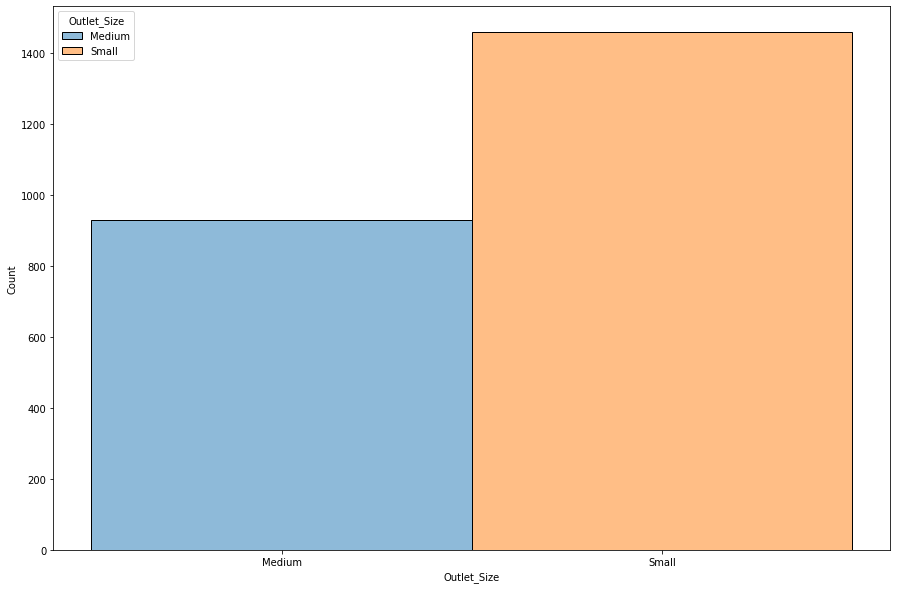

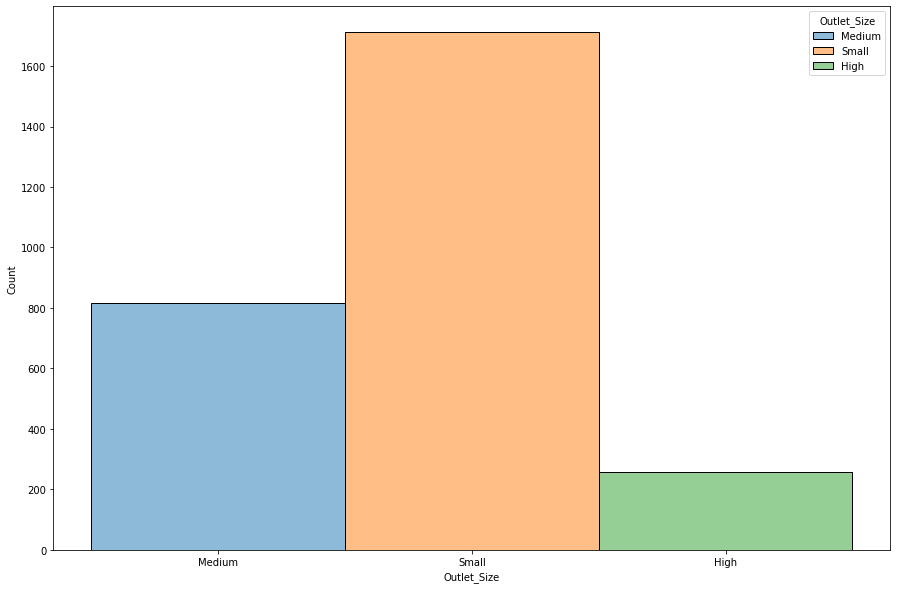

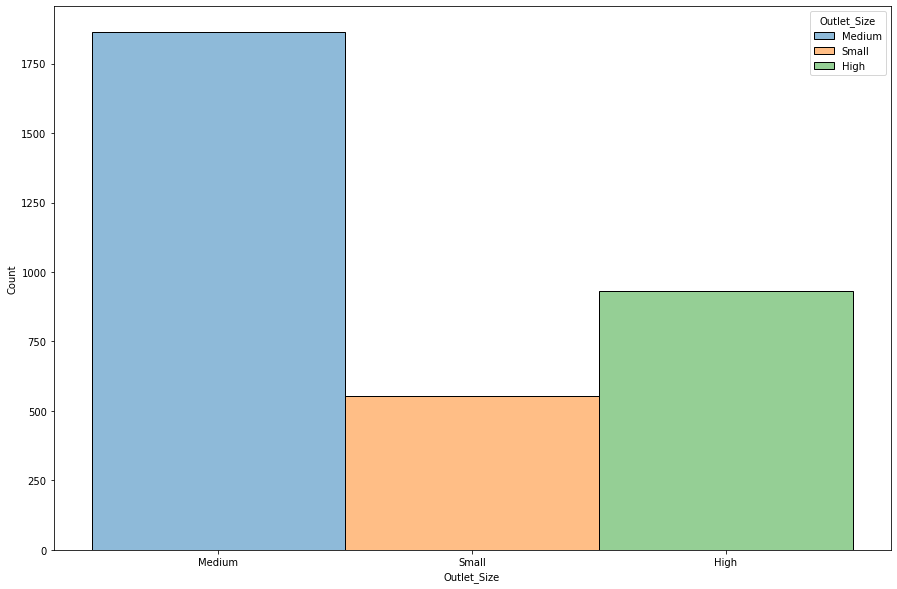

In [150]:
Type1_data = Train_set.loc[(Train_set.Outlet_Location_Type=='Tier 1')]
plt.figure(figsize=(15,10))
sns.histplot(Type1_data,x='Outlet_Size',hue='Outlet_Size')
Type1_data = Train_set.loc[(Train_set.Outlet_Location_Type=='Tier 2')]
plt.figure(figsize=(15,10))
sns.histplot(Type1_data,x='Outlet_Size',hue='Outlet_Size')
Type1_data = Train_set.loc[(Train_set.Outlet_Location_Type=='Tier 3')]
plt.figure(figsize=(15,10))
sns.histplot(Type1_data,x='Outlet_Size',hue='Outlet_Size')

# EDA




In [151]:
dups = Train_set.drop(['Item_Identifier','Outlet_Identifier'],axis='columns').duplicated()
dups.sum()

0

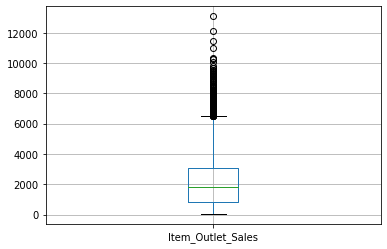

In [152]:
Train_set.boxplot(column=['Item_Outlet_Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


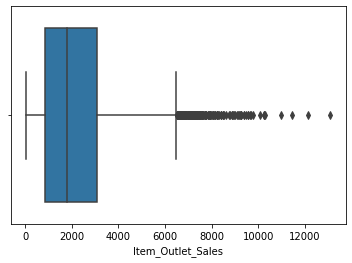

In [153]:
sns.boxplot(Train_set.Item_Outlet_Sales)

In [154]:
Train_set[Train_set.Item_Outlet_Sales > 6300].Item_Outlet_Sales.min()

6301.1312

In [155]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR = Q3-Q1
  lower_range = Q1-(1.5*IQR)
  upper_range = Q3+(1.5*IQR)
  return lower_range,upper_range



In [156]:
low,high = remove_outlier(Train_set['Item_Outlet_Sales'])
print([low,high])

[-2566.3261, 6501.8699]


In [157]:
Train_set[Train_set.Item_Outlet_Sales > 6501.8699].Item_Outlet_Sales.count()

186

In [158]:
Train_set.Item_Outlet_Sales.count()

8523

In [159]:
drop_index = Train_set.index[Train_set.Item_Outlet_Sales > 6501.8699].tolist()
Train_set.drop(drop_index, axis=0,inplace=True)
Train_set.shape

(8337, 12)

In [160]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8337 non-null   object 
 1   Item_Weight                8337 non-null   float64
 2   Item_Fat_Content           8337 non-null   object 
 3   Item_Visibility            8337 non-null   float64
 4   Item_Type                  8337 non-null   object 
 5   Item_MRP                   8337 non-null   float64
 6   Outlet_Identifier          8337 non-null   object 
 7   Outlet_Establishment_Year  8337 non-null   int64  
 8   Outlet_Size                8337 non-null   object 
 9   Outlet_Location_Type       8337 non-null   object 
 10  Outlet_Type                8337 non-null   object 
 11  Item_Outlet_Sales          8337 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 846.7+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


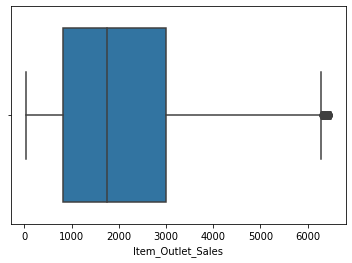

In [161]:
sns.boxplot(Train_set.Item_Outlet_Sales)

In [162]:
Train_set[Train_set.Item_Outlet_Sales>6503]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


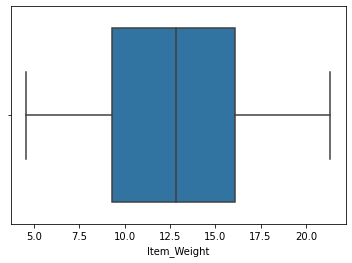

In [163]:
sns.boxplot(Train_set.Item_Weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


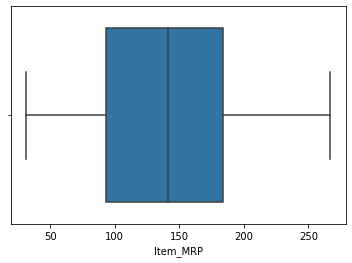

In [164]:
sns.boxplot(Train_set.Item_MRP)

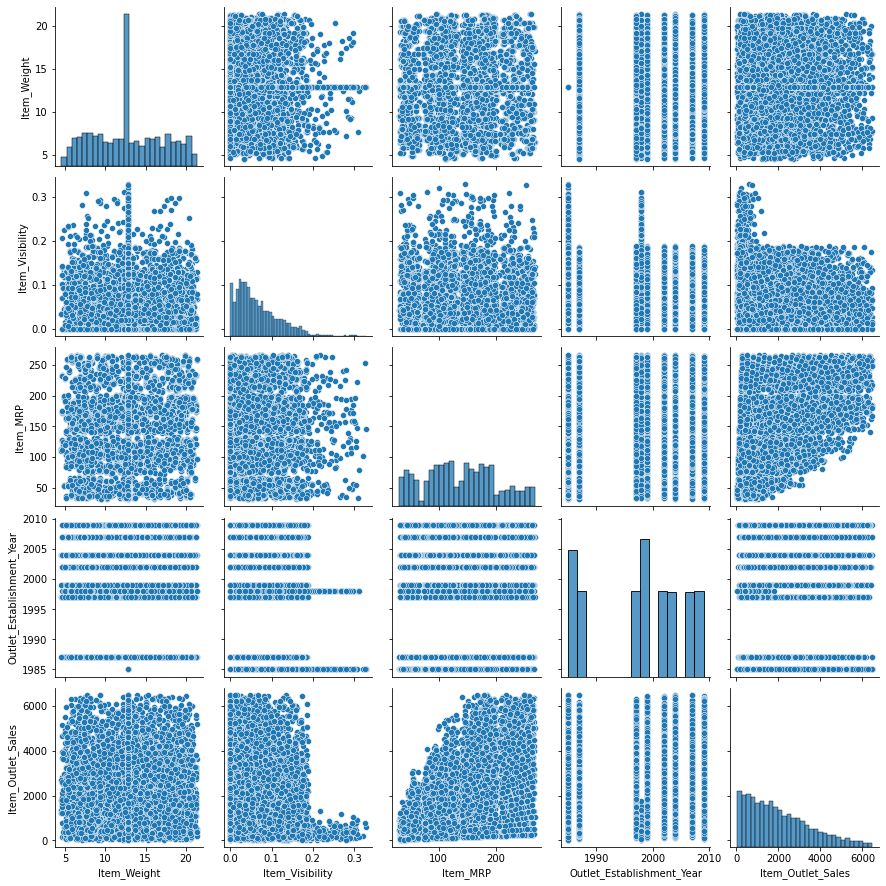

In [165]:
sns.pairplot(Train_set)

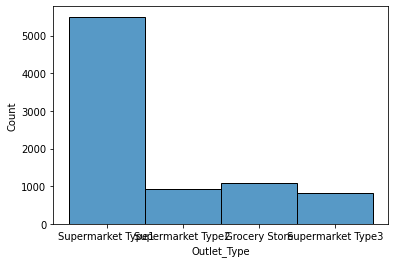

In [166]:
sns.histplot(x=Train_set.Outlet_Type)


# Scaling and Normalization

In [167]:
Train_set.loc[:,['Item_Weight',	'Item_Visibility',	'Item_MRP']]

,Item_Weight,Item_Visibility,Item_MRP
0,9.300,0.016047,249.8092
1,5.920,0.019278,48.2692
2,17.500,0.016760,141.6180
3,19.200,0.000000,182.0950
4,8.930,0.000000,53.8614
...,...,...,...
8518,6.865,0.056783,214.5218
8519,8.380,0.046982,108.1570
8520,10.600,0.035186,85.1224
8521,7.210,0.145221,103.1332


In [168]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [169]:
def scale_data(col,min,max):
  scaler = MinMaxScaler(feature_range = (min,max))
  col = np.array(col)
  scaled_data = scaler.fit_transform(col.reshape(-1,1))
  scaled_data = pd.Series(scaled_data.flatten())
  return scaled_data

In [170]:
Item_Weight_Scaled = scale_data(Train_set['Item_Weight'],0,10)
Item_Visibility_Scaled = scale_data(Train_set['Item_Visibility'],0,10)
Item_MRP_Scaled = scale_data(Train_set['Item_MRP'],0,10)
pd.DataFrame({'Item_Weight_Scaled':Item_Weight_Scaled,'Item_Visibility_Scaled':Item_Visibility_Scaled,'Item_MRP_Scaled':Item_MRP_Scaled}).describe()

,Item_Weight_Scaled,Item_Visibility_Scaled,Item_MRP_Scaled
count,8337.000000,8337.000000,8337.000000
mean,4.942922,2.020694,4.578600
std,2.530759,1.578540,2.612639
min,0.000000,0.000000,0.000000
25%,2.825246,0.823053,2.621249
50%,4.943522,1.642534,4.665796
75%,6.874070,2.901994,6.468847
max,10.000000,10.000000,10.000000


In [175]:
#add the newly scaled numeric columns
Train_set[['Item_Weight_Scaled',	'Item_Visibility_Scaled',	'Item_MRP_Scaled']] = pd.DataFrame({'Item_Weight_Scaled':Item_Weight_Scaled,'Item_Visibility_Scaled':Item_Visibility_Scaled,'Item_MRP_Scaled':Item_MRP_Scaled})

In [232]:
Train_set.isna().sum()

Item_Fat_Content                   0
Outlet_Establishment_Year          0
Outlet_Size                        0
Outlet_Location_Type               0
Item_Outlet_Sales                  0
Item_Weight_Scaled                 0
Item_Visibility_Scaled             0
Item_MRP_Scaled                    0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Type_Grocery Store          0
Outlet_Type_Supermarket Type1      0
Outlet_Type_Supermarket Type2      0
dtype: int64

In [231]:
Train_set.dropna(inplace=True)

In [177]:
#drop the old numeric columns 
Train_set.drop(['Item_Weight',	'Item_Visibility',	'Item_MRP'],axis='columns',inplace = True)
Train_set.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Scaled,Item_Visibility_Scaled,Item_MRP_Scaled
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2.825246,0.488665,9.275071
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.812742,0.587051,0.720684
2,FDN15,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,7.707651,0.510370,4.682884
3,FDX07,Regular,Fruits and Vegetables,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,8.719857,0.000000,6.400935
4,NCD19,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2.604942,0.000000,0.958046


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

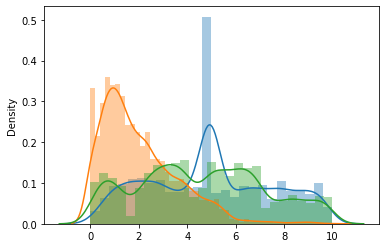

In [183]:
#the Visibility and MRP columns need to be normalized
sns.distplot(x=Item_Weight_Scaled)
sns.distplot(x=Item_Visibility_Scaled)
sns.distplot(x=Item_MRP_Scaled)

# Data Inconsistency

In [190]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [191]:
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [192]:
def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [193]:
matches = fuzzywuzzy.process.extract("Low Fat", Train_set.Item_Fat_Content.unique(), limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('Low Fat', 100), ('low fat', 100), ('LF', 22), ('Regular', 14), ('reg', 0)]

In [194]:
replace_matches_in_column(df=Train_set, column='Item_Fat_Content', string_to_match="Low Fat",min_ratio=20)

All done!


In [201]:
matches = fuzzywuzzy.process.extract("Regular", Train_set.Item_Fat_Content.unique(), limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('reg', 60), ('Low Fat', 14)]

In [197]:
replace_matches_in_column(df=Train_set, column='Item_Fat_Content', string_to_match="Reg",min_ratio=50)

All done!


In [200]:
Train_set.Item_Fat_Content.unique()

array(['Low Fat', 'reg'], dtype=object)

In [202]:
Train_set.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

# Encoding

the features Item_Fat_Content, Outlet_Size, Outlet_Location_Type will be encoded using ordinal encoding since the already have ordinal meaning.
However, Item_Type, , Outlet_Type will be encoded using OHE as the don't have ordinal meaning.

In [ ]:
d1 = {'Low Fat': 1, 'reg': 2}
d2 = {'Small':1,'Medium':2,'High':3}
d3 = {'Tier 1':1,'Tier 2':2,'Tier 3':3}
Train_set.replace({"Item_Fat_Content":d1,"Outlet_Size": d2,"Outlet_Location_Type":d3},inplace=True)
Train_set.head()

In [ ]:
Train_set.drop(['Item_Identifier','Outlet_Identifier'],axis='columns',inplace=True)

In [211]:
Train_set.shape

(8337, 10)

In [214]:
Train_set = pd.get_dummies(Train_set)
Train_set.shape

(8337, 28)

In [219]:
Train_set.columns

Index(['Item_Fat_Content', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_Outlet_Sales', 'Item_Weight_Scaled',
       'Item_Visibility_Scaled', 'Item_MRP_Scaled', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [220]:
#droping the Item_Type_Others and Outlet_Type_Supermarket Type3 columns to reduce multicolinearity
Train_set.drop(['Item_Type_Others','Outlet_Type_Supermarket Type3'],axis='columns',inplace=True)

# Modeling

In [234]:
X = Train_set.drop('Item_Outlet_Sales',axis='columns')

y = Train_set.Item_Outlet_Sales

In [235]:
X.shape

(8154, 25)

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [237]:
X_train.isna().sum()

Item_Fat_Content                   0
Outlet_Establishment_Year          0
Outlet_Size                        0
Outlet_Location_Type               0
Item_Weight_Scaled                 0
Item_Visibility_Scaled             0
Item_MRP_Scaled                    0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Type_Grocery Store          0
Outlet_Type_Supermarket Type1      0
Outlet_Type_Supermarket Type2      0
dtype: int64

In [224]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [238]:
model.fit(X_train,y_train)

LinearRegression()

In [239]:
model.score(X_train,y_train)

0.24905919208828187

In [240]:
model.score(X_test,y_test)

0.21677253864760582

In [241]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)

In [242]:
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.738
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                              611.7
Date:                Tue, 06 Sep 2022   Prob (F-statistic):                        0.00
Time:                        16:08:42   Log-Likelihood:                         -46927.
No. Observations:                5463   AIC:                                  9.390e+04
Df Residuals:                    5438   BIC:                                  9.407e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------